# **Data Analysis and Exploration Notes**

Most models don’t fail because the algorithm is weak — they fail because the dataset is misunderstood, biased, leaky, or structurally broken. Before you even think about architectures or hyperparameters, you should aggressively interrogate the data. This phase determines whether your model learns signal or just memorizes noise.


- Clear definition of the prediction target (what exactly is being predicted)

- Clear understanding of how each feature is generated and collected

- Confirmation that features would realistically be available at inference time

- Identification of proxy variables that may unintentionally leak the target

- Awareness of temporal ordering (especially critical for time series)

In [19]:
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# California Housing dataset on OpenML
X, y = fetch_openml(
    name="california_housing",
    version=1,
    as_frame=True,
    return_X_y=True
)

df = pd.concat([X, y.rename("MedHouseValue")], axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  int64   
 3   total_rooms         20640 non-null  int64   
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  int64   
 6   households          20640 non-null  int64   
 7   median_income       20640 non-null  float64 
 8   ocean_proximity     20640 non-null  category
 9   MedHouseValue       20640 non-null  int64   
dtypes: category(1), float64(4), int64(5)
memory usage: 1.4 MB


In [ ]:
df.hist(figsize=(14,10), bins=30)
plt.tight_layout()
plt.show()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.skew(numeric_only=True).sort_values(ascending=False) 
# High skew -> log transforms likely needed

population            4.935858
total_rooms           4.147343
total_bedrooms        3.459546
households            3.410438
median_income         1.646657
MedHouseValue         0.977763
latitude              0.465953
housing_median_age    0.060331
longitude            -0.297801
dtype: float64

In [ ]:
df.kurtosis(numeric_only=True).sort_values(ascending=False)
# High Kurtosis -> Hevay Tails -> Fragile Models

population            73.553116
total_rooms           32.630927
households            22.057988
total_bedrooms        21.985575
median_income          4.952524
MedHouseValue          0.327870
housing_median_age    -0.800629
latitude              -1.117760
longitude             -1.330152
dtype: float64

#### **Missing Values and Gap Inspection**

In [ ]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
MedHouseValue           0
dtype: int64

In [16]:
(df.isna().mean() * 100).sort_values(ascending=False)

total_bedrooms        1.002907
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
MedHouseValue         0.000000
dtype: float64

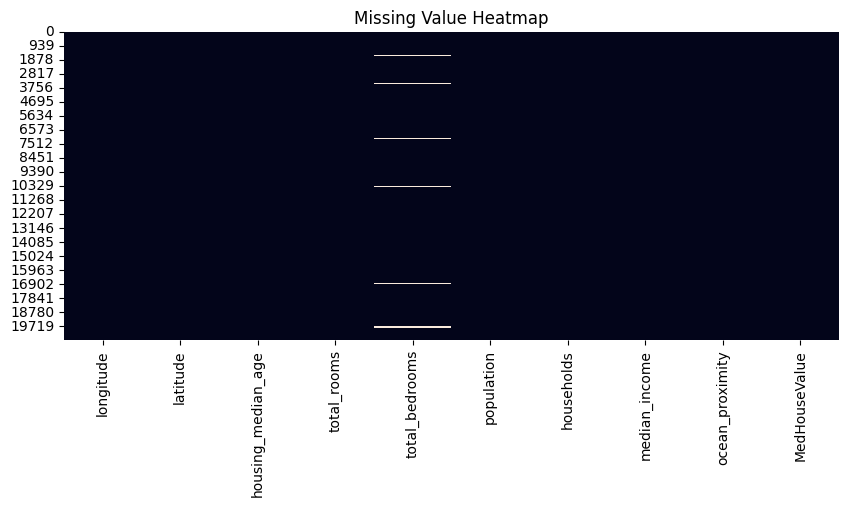

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()
